In [32]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [33]:
# nutrients = pd.read_csv("nutrients_csvfile.csv")
nutrients = pd.read_csv("new_data.csv", encoding='unicode_escape')
nutrients.head()

,Food,Calories,Fat,Sat.Fat,Trans_Fat,Cholesterol,Carbs,Fiber,Sugars,Protein
0,Hamburger,250,9.0,3.5,0.5,25,31,2,6,12
1,Cheeseburger,300,12.0,6.0,0.5,40,33,2,6,15
2,Double Cheeseburger,440,23.0,11.0,1.5,80,34,2,7,25
3,McDouble,390,19.0,8.0,1.0,65,33,2,7,22
4,Quarter Pounder with Cheese,510,26.0,12.0,1.5,90,40,3,9,29


In [34]:
# nutrients=nutrients.replace('t',np.nan,regex=True).fillna(0)
# nutrients=nutrients.replace('a',np.nan,regex=True).fillna(0)
# nutrients=nutrients.replace(',',np.nan,regex=True).fillna(0)
nutrients=nutrients.replace('',np.nan,regex=True).fillna(0)
nutrients=nutrients.replace('<1',np.nan,regex=True).fillna(1)
nutrients=nutrients.replace('<5',np.nan,regex=True).fillna(5)

nutrients.head()

,Food,Calories,Fat,Sat.Fat,Trans_Fat,Cholesterol,Carbs,Fiber,Sugars,Protein
0,Hamburger,250,9.0,3.5,0.5,25,31,2,6,12
1,Cheeseburger,300,12.0,6.0,0.5,40,33,2,6,15
2,Double Cheeseburger,440,23.0,11.0,1.5,80,34,2,7,25
3,McDouble,390,19.0,8.0,1.0,65,33,2,7,22
4,Quarter Pounder with Cheese,510,26.0,12.0,1.5,90,40,3,9,29


In [35]:
# nutrients['Grams'] = pd.to_numeric(nutrients['Grams'], errors='coerce')
nutrients['Calories'] = pd.to_numeric(nutrients['Calories'], errors='coerce')
nutrients['Fat'] = pd.to_numeric(nutrients['Fat'], errors='coerce')
nutrients['Sat.Fat'] = pd.to_numeric(nutrients['Sat.Fat'], errors='coerce')
nutrients['Trans_Fat']=pd.to_numeric(nutrients['Trans_Fat'], errors='coerce')
nutrients['Cholesterol']=pd.to_numeric(nutrients['Cholesterol'], errors='coerce')
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'], errors='coerce')
nutrients['Fiber'] = pd.to_numeric(nutrients['Fiber'], errors='coerce')
nutrients['Sugars']=pd.to_numeric(nutrients['Sugars'], errors='coerce')
nutrients['Protein'] = pd.to_numeric(nutrients['Protein'], errors='coerce')

In [36]:
nutrients.dtypes

Food            object
Calories         int64
Fat            float64
Sat.Fat        float64
Trans_Fat      float64
Cholesterol      int64
Carbs            int64
Fiber            int64
Sugars           int64
Protein          int64
dtype: object

In [37]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food           False
Calories       False
Fat            False
Sat.Fat        False
Trans_Fat      False
Cholesterol    False
Carbs          False
Fiber          False
Sugars         False
Protein        False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
          Calories          Fat      Sat.Fat    Trans_Fat  Cholesterol  \
count  1101.000000  1101.000000  1101.000000  1101.000000  1101.000000   
mean    288.174387    11.449137     3.986830     0.138056    41.375114   
std     223.191277    13.913520     5.007091     0.485251    68.377057   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     140.000000     0.000000     0.000000     0.000000     0.000000   
50%     240.000000     8.000000     2.500000     0.000000    20.000000   
75%     390.00

In [38]:
nutrients=nutrients.dropna()
nutrients.shape

(1101, 10)

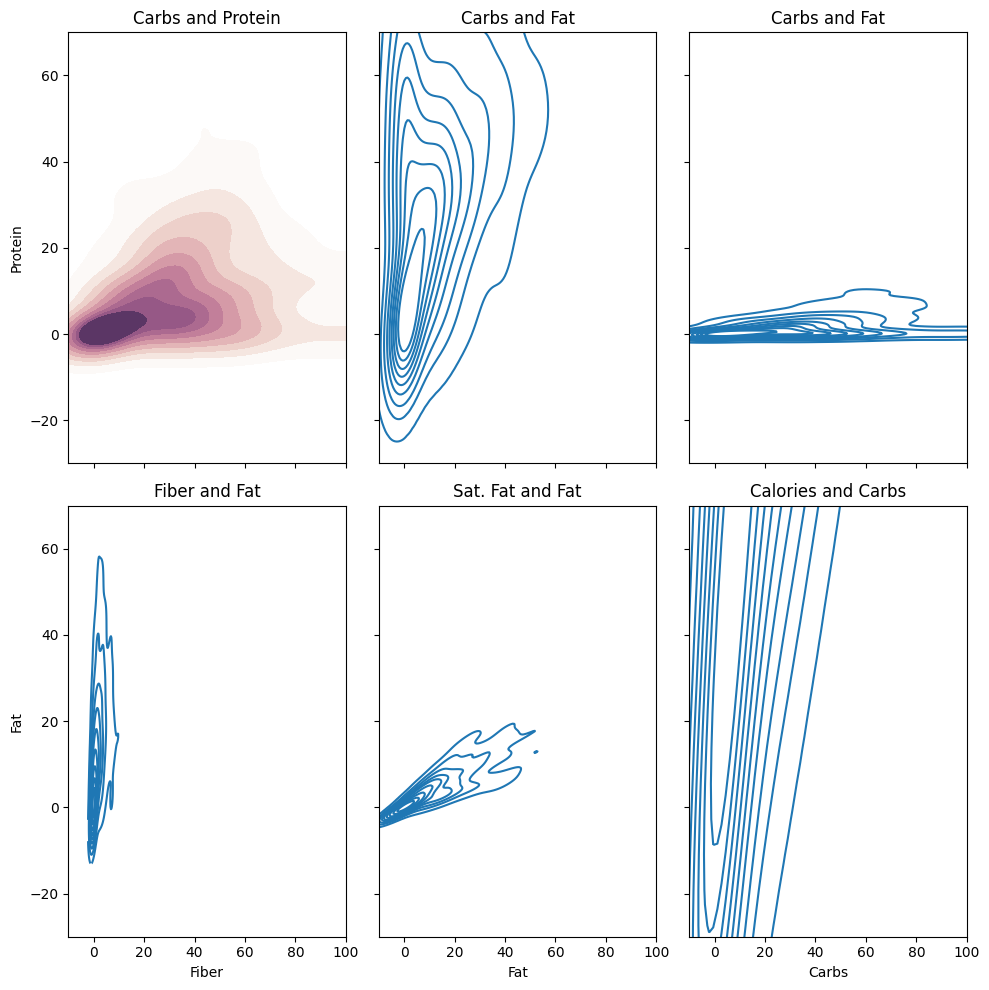

In [54]:
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'],
            cmap=cmap, fill=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'], y=nutrients['Carbs'], ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

f.tight_layout()


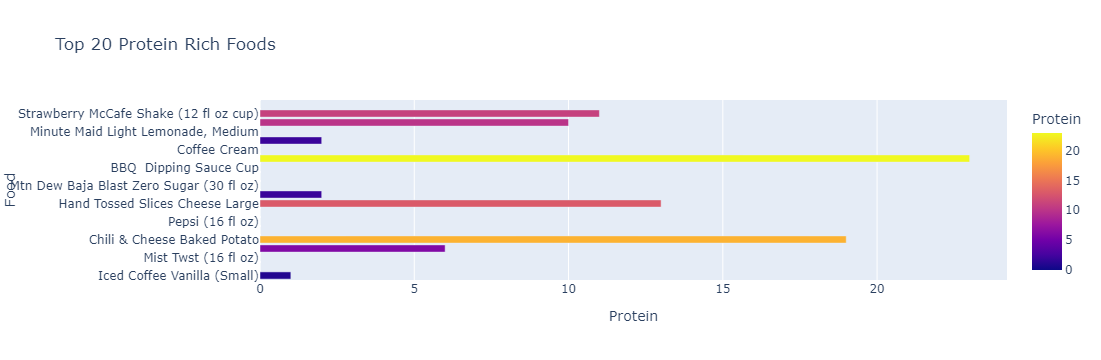

In [40]:
# protein_rich = nutrients.sort_values(by='Protein', ascending=False)
# top_20=protein_rich.head(20)
# fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 20 protein rich foods')
# fig.show()
# import plotly.express as px

# protein_rich = nutrients.sort_values(by='Protein', ascending=False)
# top_20 = protein_rich.head(20)

# fig = px.bar(top_20, y='Food', x='Protein', color='Protein', orientation='h', title='Top 20 Protein Rich Foods')
# fig.show()
import plotly.express as px
import numpy as np

protein_rich = nutrients.copy().sort_values(by='Protein', ascending=False)
shuffled_index = np.random.permutation(protein_rich.index)
protein_rich = protein_rich.reindex(shuffled_index).head(20)

fig = px.bar(protein_rich, y='Food', x='Protein', color='Protein', orientation='h', title='Top 20 Protein Rich Foods')
fig.show()

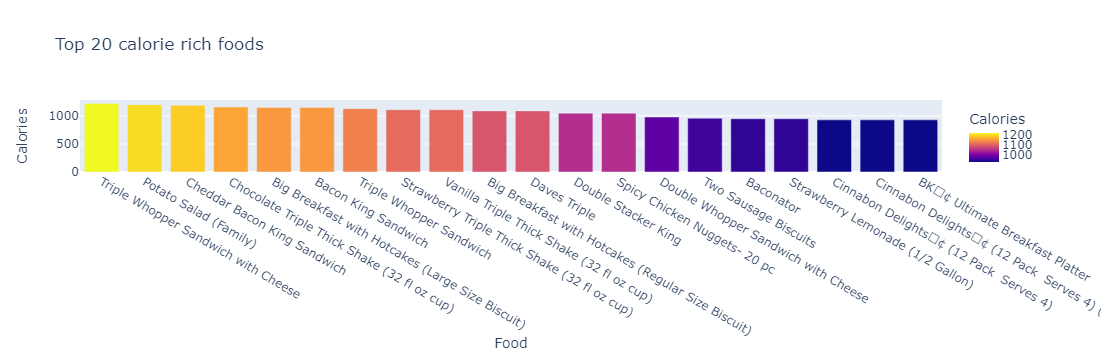

In [41]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20_cals, x='Food', y='Calories',
             color='Calories', title=' Top 20 calorie rich foods')
fig.show()

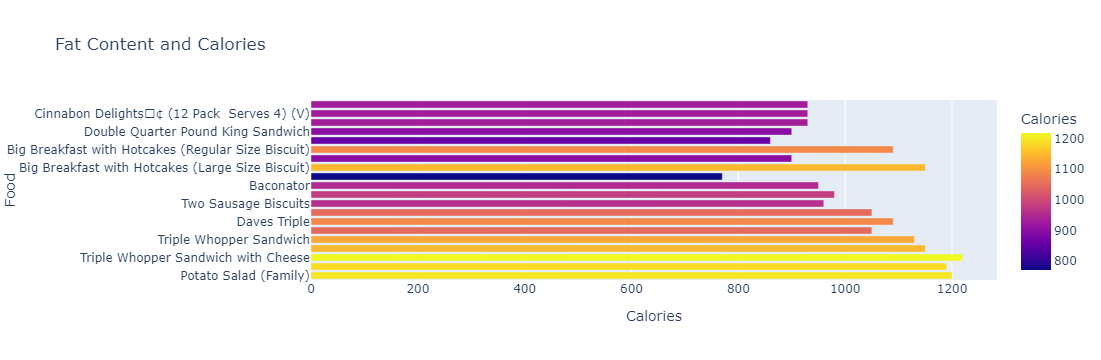

In [42]:
# fats= nutrients.sort_values(by='Fat', ascending= False)
# top_20_fat=fats.head(20)
# fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
# fig.show()

import plotly.express as px

fats = nutrients.sort_values(by='Fat', ascending=False)
top_20_fat = fats.head(20)

fig = px.bar(top_20_fat, y='Food', x='Calories', color='Calories', orientation='h', title='Fat Content and Calories')
fig.show()


In [43]:
# category_dist = nutrients.groupby(['Category']).sum()
# category_dist.drop(['Measure'], axis=1, inplace=True)
# category_dist['C/G'] = category_dist.Calories.div(category_dist.Grams)
# category_dist = category_dist.sort_values(by='C/G', ascending=False)
# category_dist=category_dist
# category_dist

In [44]:
# fats= category_dist.sort_values(by='C/G', ascending= False)
# top_20_fat=fats.head(20)
# fig = px.bar(top_20_fat, x='Food', y='C/G', color='C/G', title='Calories per gram')
# fig.show()

In [45]:
# def categorize_food(calories):
    
#     low_threshold = 2
#     high_threshold = 4
    
#     if calories < low_threshold:
#         return 'Low'
#     elif low_threshold <= calories < high_threshold:
#         return 'Mid'
#     else:
#         return 'High'

# category_dist['Food'] = category_dist['Calories'].apply(categorize_food)
# category_dist

In [46]:
# category_dist=nutrients.groupby(['Category']).sum()
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(
#     rows=2, cols=3,
#     specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

# fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
#               row=1, col=1)

# fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
#               row=1, col=2)

# fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
#               row=1, col=3)

# fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
#               row=2, col=1)

# fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
#               row=2, col=2)

# fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
#               row=2, col=3)
# fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

# fig.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("new_data.csv", encoding='unicode_escape')

X = data[['Protein', 'Fat', 'Fiber', 'Carbs']]
y = data['Calories']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LinearRegression()
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(X_test).round()
# print(y_test.shape)
# print(X_test.shape)
# print(X_train.shape)
# print(y_train.shape)
# print(y_pred.shape)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) --> {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE) --> {rmse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) --> {mae:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) --> {r2:.2f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, pos_label='positive', average='weighted')
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred, pos_label='positive', average='weighted')
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred, pos_label='positive', average='weighted')
print(f'F1 Score: {f1:.2f}')

# conf_matrix = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(conf_matrix)

Mean Squared Error (MSE) --> 2884.05
Root Mean Squared Error (RMSE) --> 53.70
Mean Absolute Error (MAE) --> 23.24
R-squared (R²) --> 0.95
Accuracy: 0.38
Precision: 0.39
Recall: 0.38
F1 Score: 0.36


C:\Users\gaurav shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1549: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.

C:\Users\gaurav shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\gaurav shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1549: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.

C:\Users\gaurav shresth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.

In [50]:
import tabulate
def predict_calories(user_input):
    user_data = pd.DataFrame([user_input])
    predicted_calories = model.predict(user_data)
    return predicted_calories[0]

def get_food_recommendations():
    user_input = {
        'Protein': 250.0,
        'Fat': 200.0,
        'Fiber': 100.0,
        'Carbs': 260.0
    }

    predicted_calories = predict_calories(user_input)
    print(f'Predicted Calories --> : {predicted_calories}')
    
    # Assuming standard calorie values for healthy, moderate, and unhealthy foods
    healthy_calories = 1800
    moderate_calories = 2400
    unhealthy_calories = 3000
    
    filtered_data = data[data['Calories'] <= predicted_calories]

    if filtered_data.empty:
        return "No food items available in the dataset."

    all_food_recommendations = filtered_data[[
        'Food', 'Calories', 'Protein', 'Fat', 'Fiber', 'Carbs']]

    all_food_recommendations['Meal Category'] = pd.cut(all_food_recommendations['Calories'],
                                                       bins=[
                                                           0, 300, 600, 1000, float('inf')],
                                                       labels=[
                                                           'Light Snack', 'Breakfast', 'Lunch', 'Dinner'],
                                                       include_lowest=True)

    tables = {}
    for category in all_food_recommendations['Meal Category'].unique():
        category_data = all_food_recommendations[all_food_recommendations['Meal Category'] == category]
        if not category_data.empty:
            top5_food_recommendations = category_data[[
                'Food', 'Calories', 'Protein', 'Fat', 'Fiber', 'Carbs']].head(5)
            tables[category] = tabulate.tabulate(
                top5_food_recommendations, headers='keys', tablefmt='pretty', showindex=False)
        else:
            tables[category] = f"No food items available for {category}."

    return tables

In [55]:
meal_category_tables = get_food_recommendations()
for category, table in meal_category_tables.items():
    print(f"\n{category}:\n{table}")

Predicted Calories --> : 1090

Light Snack:
+------------------------------------+----------+---------+------+-------+-------+
|                Food                | Calories | Protein | Fat  | Fiber | Carbs |
+------------------------------------+----------+---------+------+-------+-------+
|             Hamburger              |   250    |   12    | 9.0  |   2   |  31   |
|            Cheeseburger            |   300    |   15    | 12.0 |   2   |  33   |
|     Ranch Snack Wrap (Grilled)     |   270    |   18    | 10.0 |   1   |  26   |
| Honey Mustard Snack Wrap (Grilled) |   260    |   18    | 9.0  |   1   |  27   |
| Chipotle BBQ Snack Wrap (Grilled)  |   260    |   18    | 9.0  |   1   |  28   |
+------------------------------------+----------+---------+------+-------+-------+

Breakfast:
+-----------------------------+----------+---------+------+-------+-------+
|            Food             | Calories | Protein | Fat  | Fiber | Carbs |
+-----------------------------+----------+---

C:\Users\gaurav shresth\AppData\Local\Temp\ipykernel_10884\1149410015.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
def predict_nutritional_values(food_intake):
    total_nutrition = {
        'Calories' : 0,
        'Fat': 0,
        'Sat.Fat': 0,
        'Trans_Fat': 0,
        'Cholesterol': 0,
        'Carbs': 0,
        'Fiber': 0,
        'Sugars': 0,
        'Protein': 0
    }
    
    for meal, foods in food_intake.items():
        meal_data = data[data['Food'].isin(foods)]
        if not meal_data.empty:
            for nutrient in total_nutrition.keys():
                total_nutrition[nutrient] += meal_data[nutrient].sum()
    
    return total_nutrition

def predict_calories_from_food(food_intake):
    total_nutrition = predict_nutritional_values(food_intake)
    total_calories = total_nutrition['Calories']
    calorie_category = categorize_calories(total_calories)
    
    return total_calories, calorie_category, total_nutrition


In [57]:
food_intake = {
    'breakfast': ['Double Cheeseburger', 'McChicken'],
    'lunch': ['Chicken McNuggets (10 piece)', 'Spicy Buffalo Sauce'],
    'dinner': ['Egg McMuffin', 'Egg McMuffin']
}

def display_total_nutrition(total_nutrition):
    headers = ['Nutrient', 'Amount']
    table_data = [[nutrient, value] for nutrient, value in total_nutrition.items()]
    print(tabulate.tabulate(table_data, headers=headers, tablefmt='pretty'))
    
predicted_calories, calorie_category, total_nutrition = predict_calories_from_food(food_intake)
print(f'Predicted total calorie intake: {predicted_calories} calories')
print(f'Calorie category: {calorie_category}')
print('Total Nutritional Values:') 
display_total_nutrition(total_nutrition)

Predicted total calorie intake: 1660 calories
Calorie category: Healthy
Total Nutritional Values:
+-------------+--------+
|  Nutrient   | Amount |
+-------------+--------+
|  Calories   |  1660  |
|     Fat     |  92.0  |
|   Sat.Fat   |  31.0  |
|  Trans_Fat  |  3.0   |
| Cholesterol |  490   |
|    Carbs    |  122   |
|    Fiber    |   8    |
|   Sugars    |   17   |
|   Protein   |   88   |
+-------------+--------+
